In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.weightstats import *
import scipy.stats as sts
%pylab inline
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('churn_analysis.csv')
data.drop('Unnamed: 0', 1, inplace=True)
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


# 1
Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Какой критерий подходит для решения этой задачи? Сколько достигаемых уровней значимости оказались меньше, чем α=0.05?

In [3]:
# наша контрольная группа
treatment_1 = data[data.treatment == 1]

In [4]:
# названия всех штатов
names_of_states = list(set(treatment_1.state))

# неупорядоченные пары всех штатов
states_combinations = itertools.combinations(names_of_states, 2)

In [5]:
# формируем список из 1275 неупорядоченных пар штатов
states = []
for combination in states_combinations:
    states.append(combination)
    
results = ['True.', 'False.']

In [6]:
# def Generate_contingency_for_states_pairs_and_churn(results, states):
#     """Метод формирует таблицу сопряженности для неупорядоченныйх пар
#        штатов и значениями churn."""
    
#     contingency = pd.DataFrame(columns=results, index=states)

#     for result in results:
#         for state in states:
#             contingency[result][state] = treatment_1.loc[((treatment_1.state==state[0]) 
#                                                       | (treatment_1.state==state[1])) 
#                                                      & (treatment_1.churn==result)].shape[0]
        
#     contingency['row_totals'] = contingency.sum(1)
#     contingency.loc['col_totals'] = contingency.sum(0)
#     return contingency

Построим таблицы сопряженности между каждой из 1275 возможных неупорядоченных пар штатов и значением признака churn.

In [7]:
def Generate_contingency_list(states, results):
    """Метод генерирует 1275 таблиц сопряженности для каждой из неупорядоченный пар штатов и значений churn"""
    
    contingencies = []
    
    for i in range(len(states)):
        contingency = pd.DataFrame(index=states[i], columns=results)
        for result in results:
            for state in states[i]:
                contingency[result][state] = treatment_1.loc[(treatment_1.state == state)
                                      & (treatment_1.churn == result)].shape[0]
                
    #     contingency['row_totals'] = contingency.sum(1)
    #     contingency.loc['col_totals'] = contingency.sum(0)
        
        contingencies.append(contingency)        
    
    return contingencies

In [8]:
# формируем список таблиц сопряженности
contingencies = Generate_contingency_list(states, results)

Проверим гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.
<p>Введем основную и альтернативные гипотезы:</p>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{признаки state и churn независимы}\\
   H_1 : H_0 \text{ неверна}
 \end{cases}
\end{equation*}$

Для проверки данной гипотезы воспользуемся точным критерием Фишера по той причине, что мы осуществляем сравнение очень малых выборок, и наши таблицы сопряженности имеют размерность 2х2.

In [9]:
count = 0
for contingency in contingencies:
    p = sts.fisher_exact(contingency)[1]
    if p <= 0.05:
        count += 1
print("%d достигаемых уровней значимости оказались меньше, чем α=0.05"%count)

10 достигаемых уровней значимости оказались меньше, чем α=0.05


Гипотеза $H_0$ отвергается в пользу $H_1$ в меньшенстве случаев, поэтому можно сделать вывод о том, что штат абонента не влияет на прекращение использования услуг оператора. 

In [10]:
# states_pairs_and_churn_contingency = Generate_contingency_for_states_pairs_and_churn(results, states)

In [11]:
# observed_pairs = states_pairs_and_churn_contingency.ix[0:1275, 0:2]
# observed_pairs.head()

In [12]:
# stat, p_value, degrees, exp = sts.chi2_contingency(observed=observed_pairs)
# print('Chi squared statistics value: ',stat)
# print('P value:', p_value)

In [13]:
# crit_stat = sts.chi2.ppf(0.05, degrees)
# print('Critical chi squared statistics value: ',crit_stat)

In [14]:
# if stat > crit_stat:
#     print('Null hypothesis is false, features are dependent!')
# else:
#     print('Null hypothesis is true, features are independent!')

# 2
Посчитайте корреляции Пирсона и Спирмена между day_calls и mes_estim на всех данных, оцените их значимость, дайте интерпретацию результата.

Прежде чем смотреть значения корреляции Пирсона и Спирмена для day_calls и mes_estim посмотрим, насколько распределение этих признаков приближено к нормальному, потому что нормальность признаков требуется для рассчета корреляции Пирсона.

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165], dtype=int64)),
 (20.063266290159007, 100.43564356435644, 0.99890169693028485))

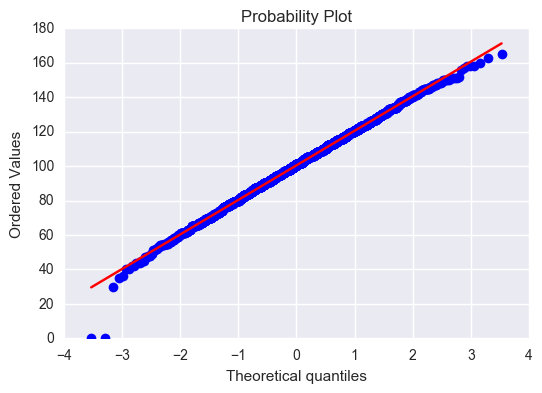

In [15]:
sts.probplot(data.day_calls, dist='norm', plot=pylab)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([ 0.05,  0.05,  0.05, ...,  0.89,  0.91,  0.96])),
 (0.13861708020693372, 0.48423642364236419, 0.99960504839853292))

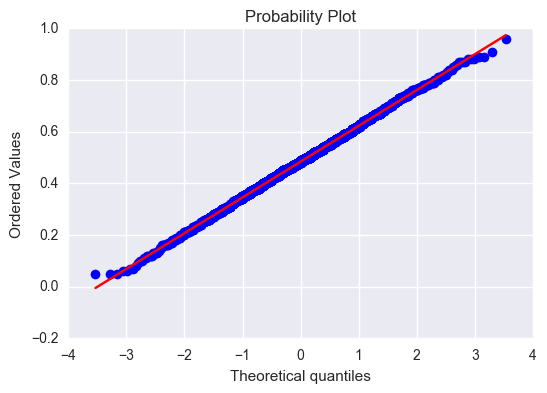

In [16]:
sts.probplot(data.mes_estim, dist='norm', plot=pylab)

Как видно из графиков выше, распределение признаков достаточно сильно приближено к нормальному.

<p>Введем основную и альтернативные гипотезы:</p>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{значения корреляций являются статистически незначимыми}\\
   H_1 :\text{значения корреляций являются статистически значимыми}
 \end{cases}
\end{equation*}$

In [17]:
pearson, pearson_p = sts.pearsonr(data.day_calls, data.mes_estim)
print('PearsonResult(correlation=%f, pvalue=%f)' % (pearson, pearson_p))

PearsonResult(correlation=-0.051794, pvalue=0.002780)


In [27]:
# критическое значение t-критерия стьюдента при alpha=0.05 и 3331 степенями своободы
# t_crit = 1.96

In [28]:
# t_pearson = (pearson*sqrt(len(data.day_calls) - 2))/(1-pearson**2)
# t_pearson

In [29]:
# def Check_hypothesis(t, t_crit):
#     if abs(t) > t_crit:
#         print("null hypothesis is false, correlation is significant")
#     else:
#         print('null hypothesus is true, correlation is not significant')

In [30]:
# Check_hypothesis(t_pearson, t_crit)

In [22]:
spearman, spearman_p = sts.spearmanr(data.day_calls, data.mes_estim)
print('SpearmanResult(correlation=%f, pvalue=%f)' % (spearman, spearman_p))

SpearmanResult(correlation=0.043350, pvalue=0.012317)


In [24]:
# t_spearman = (spearman*sqrt(len(data.day_calls) - 2))/(1-spearman**2)
# t_spearman

In [25]:
# Check_hypothesis(t_spearman, t_crit)

$P$-значения для обоих видов корреляции между признаками меньше, чем $\alpha=0.05$, поэтому значения корреляций можно считать статистически __значимыми__.

# 3
Посчитайте значение коэффицента корреляции Крамера между штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Проверьте гипотезу об отсутствии связи между этими признаками.

In [34]:
def Generate_contingency_for_states_and_churn(results, names_of_states):
    """Метод формирует таблицу сопряженности для штатов и значений churn."""
    
    contingency = pd.DataFrame(columns=results, index=names_of_states)

    for result in results:
        for name in names_of_states:
            contingency[result][name] = treatment_1.loc[(treatment_1.state == name) 
                                & (treatment_1.churn == result)].shape[0]
        
    contingency['row_totals'] = contingency.sum(1)
    contingency.loc['col_totals'] = contingency.sum(0)
    return contingency

In [35]:
states_and_churn_contingency = Generate_contingency_for_states_and_churn(results, names_of_states)

In [36]:
states_and_churn_contingency.shape

(52, 3)

In [37]:
observed_state = states_and_churn_contingency.ix[0:51, 0:2]
observed_state.head()

,True.,False.
SD,3,20
ID,2,16
MS,4,20
WY,2,20
ND,3,21


$\chi^2$ для observed

In [40]:
stat, p_value, degrees, exp = sts.chi2_contingency(observed=observed_state)
print('Chi squared statistics: ',stat)
print('P value:', p_value)

Chi squared statistics:  44.0527123669255
P value: 0.709759004278


Посчитаем $V$ коэффициент Крамера для observed.

<p>Формула коэффициента $V$ Крамера выглядит как $V=\sqrt{\frac{\chi^2 / n}{min(k-1, r-1)}}$, где $k$-количество столбцов, $r$-количество строк, $n$-количество элементов.</p>

<p>Но так как в нашем датасете количество столбцов равно 2, то формула принимает следующий вид: $V=\sqrt{\frac{\chi^2}{n}}$ </p>

In [39]:
# считаем значение коэффициента Крамера
V = sqrt((stat / np.sum(observed_state.sum().sum())))
print("Cramer's V:", V)

Cramer's V: 0.20039321502


Коэффициент $V$ Крамера является мерой силы взаимосвязи между двумя категориальными признаками и принимает значения $V\in[0,1]$
<p>Для признаков state и churn $V$=0.2, значит, между ними имеется небольшая связь.</p>
<p>Чтобы окончательно определиться, какую связь имеют признаки state и churn, проверим гипотезу об их независимости при $\alpha=0.05$.</p>

<p>Введем основную и альтернативные гипотезы:</p>
$\begin{equation*}
 \begin{cases}
   H_0 :\text{признаки state и churn независимы}\\
   H_1 : H_0\text{ неверна}
 \end{cases}
\end{equation*}$

Так как $P >\alpha$    $(\alpha=0.05)$, $H_0$ __не__ отвергается в пользу $H_1$.

# 4
Проведите анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1). Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

In [41]:
# группа, к которой применялся метод удержания 0
treatment_0 = data[data.treatment == 0]

# группа, к которой применялся метод удержания 2
treatment_2 = data[data.treatment == 2]

In [49]:
def Count_Z_stat(p1, p2, n1, n2):
    """Метод считает Z статистику для гипотезы о равенстве долей признаков"""
    P = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))

In [50]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    """Метод считает p-value для рассчитанной Z статистики, в зависимости от выбора альтернативной гипотезы"""
    
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sts.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sts.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sts.norm.cdf(z_stat)

###### Проверка для treatment_0 и treatment_1

<p>Введем основную и альтернативные гипотезы:</p>
$\begin{equation*}
 \begin{cases}
   H_0 : p_1=p_2 \\
   H_1 : p_1\leq p_2
 \end{cases}
\end{equation*}$

In [51]:
# количество абонентов в группе, к которой применялся метод удержания 0
n1 = pd.value_counts(treatment_0.churn).sum()

# количество абонентов в контрольной группе
n2 = n = pd.value_counts(treatment_1.churn).sum()

# доля ушедших из группы с 0 методом удержания
p1 = pd.value_counts(treatment_0.churn)['True.'] / n1

# доля ушедших из контрольной группы
p2 = pd.value_counts(treatment_1.churn)['True.'] / n2

Z = Count_Z_stat(p1, p2, n1, n2)
p = proportions_diff_z_test(Z, 'less')
print("Partitioning Inequalities test(Z=%f, p_value=%f)"%(Z, p))

Partitioning Inequalities test(Z=-1.204669, p_value=0.114166)


Из-за того, что $p>\alpha$, гипотеза $H_0$ <b>не</b> отвергается в пользу гипотезы $H_1$

##### Проверка для treatment_2 и treatment_1

<p>Введем основную и альтернативные гипотезы:</p>
$\begin{equation*}
 \begin{cases}
   H_0 : p_1=p_2 \\
   H_1 : p_1\leq p_2
 \end{cases}
\end{equation*}$

In [52]:
# количество абонентов в группе, к которой применялся метод удержания 2
n1 = pd.value_counts(treatment_2.churn).sum()

# количество абонентов в контрольной группе
n2 = n = pd.value_counts(treatment_1.churn).sum()

# доля ушедших из группы со 2 методом удержания
p1 = pd.value_counts(treatment_2.churn)['True.'] / n1

# доля ушедших из контрольной группы
p2 = pd.value_counts(treatment_1.churn)['True.'] / n2

Z = Count_Z_stat(p1, p2, n1, n2)
p = proportions_diff_z_test(Z, 'less')
print("Partitioning Inequalities test(Z=%f, p_value=%f)"%(Z, p))

Partitioning Inequalities test(Z=-2.599055, p_value=0.004674)


Из-за того, что $p\leq\alpha$, гипотеза $H_0$ отвергается в пользу гипотезы $H_1$
<p>Получается, что в группе, к которой применялся второй метод удержания, доля ушедших меньше, чем в контрольной группе __treatment_1__</p>
<p>Методы удержания 0 и 2 не одинаковы с точки зрения эффективности. Метод 2 оказался лучше и я порекомендовал бы его.</p>